### <font color='red'>Clustering </font>
 ***Es un algoritmo de i.a no supervisado ya que este a traves de una base de datos divide los datos en grupos o clusters, como no se otorga una respuesta anticipadamente lo consideramos del tipo no supervisado***<br><br>
 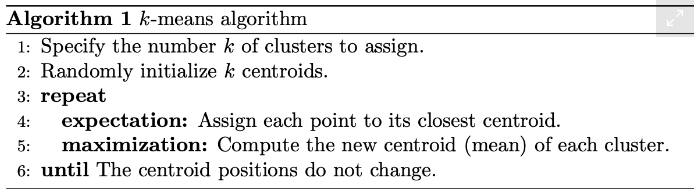 <br>
 *The quality of the cluster assignments is determined by computing the sum of the squared error (SSE) after the centroids converge, or match the previous iteration’s assignment. The SSE is defined as the sum of the squared Euclidean distances of each point to its closest centroid. Since this is a measure of error, the objective of k-means is to try to minimize this value.* <br><br>
 En resumen: El algoritmo es un bucle de n iteraciones en el que se elige los centro de los clusters aleatoariamente y se calcula su *distancia a estos* (error) , dentro de cada iteracion se determina nuevamente los centros de los clusters
 
 
**Ejemplo:** 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#df = pd.read_csv("/Users/tomas/Desktop/Facultad/Cuarto/2doCuatri/IA-Facultad/dataset.csv", sep = ';')
#X = df[["Age","Income"]].to_numpy()
#X
df = pd.read_csv("/Users/tomas/Desktop/Facultad/Cuarto/2doCuatri/IA-Facultad/clase1/datos3.csv",sep=';')

# IMPORTANTE: La lectura de datos en este caso era exponencial para poder pasarla a numeros en numpy necesitamos pasar la E a e
# y la , tiene que ser un .
dfTransformed= df.replace('E','e', regex = True).replace(',','.', regex = True)
X = dfTransformed.to_numpy().astype(float)
X

array([[39000000., 15700000.],
       [39700000., 32800000.],
       [30600000.,  1690000.],
       ...,
       [91700000., 79100000.],
       [90400000., 68000000.],
       [64300000., 71500000.]])

In [91]:
def distance(x1,x2):
            return np.sqrt(np.sum(x1-x2)**2)

class Clustering:
    def __init__(self, K , iter = 30000):
        self.K = K
        self.iter = iter
        #Inicializamos los clusters random, en una lista de listas vacia donde almacenaremos los indices
        self.clusters = [[] for i in range(K)]
        #Lista de vectores donde almacenaremos la media.
        self.centroids = [[] for i in range(K)]
    
    def kMeans(self,X):
        self.X = X
        #destructuring de la info pasada como parametro
        #Inicializaciones
        self.n_samples, self.n_features = X.shape
        random_ids = np.random.choice(self.n_samples, self.K, replace = False)
        self.centroids = np.stack([self.X[i]  for i in random_ids])
        for i in range(self.iter):
            
            # 1) calculamos la distancia de cada punto a los clusters y vemos a cual pertenece.
            # Los cluster van a ser una lista de array con el indice del punto que pertenece a ese cluster.
            # Dimesion k * cant en el cluster
            
            self.clusters = self.createClusters(self.centroids , self.K)
    
            # 2) calculamos la media de los clusters , que van a ser los nuestros centros ,dimension 1 * k
            old_centroids = self.centroids
            self.centroids = self.calculateMeans()
            old_clusters = self.clusters
            self.clusters = self.createClusters(self.centroids, self.K)
                                                
            # 3)Comparo ambos clusters y verifico si son los mismos, si son los mismos significa que convergio y si no repito
            convergio = self.converged(old_clusters, self.clusters)
            if convergio: 
                break
        for index, points in enumerate(self.clusters):
            point = self.X[points].T
            plt.scatter(*point)
            
        plt.scatter(self.centroids[:,0], self.centroids[:,1], color = 'black')
                                    
    # 4) Aca puedo volver a elegir unos puntos random y verificar la desviacion de varios clusters y me quedo con el de menos desviacion
    # FALTA HACER ESTO
        
        
    
    # Creo clusters calculo el cluster correspondiente para cada punto
    def createClusters(self,points, K):
        clusters = [[] for i in range(K)]
        for id, point in enumerate(X):
            #Creo matriz de distancias de 1 * k 
            distances = [[distance(point,self.centroids[i])] for i in range(self.K)]
            print(distances)
            #Me quedo con el indice de la menor
            index_cluster = np.argmin(distances)
            clusters[index_cluster].append(id) 
        return clusters
    
    #Calculo la media de los clusters
    def calculateMeans(self):
        means = np.zeros(shape = (5, 2))
        #Habra alguna manera de no hacerlo fila por fila 
        for i, point in enumerate(self.clusters):
            means[i] = np.mean(self.X[point], axis = 0)
        return means

    
    def converged(self, old_clusters, new_clusters):
        for i in range(self.K):
            suma1 = sum(old_clusters[i])
            suma2 = sum(new_clusters[i])
            if ( (suma1 - suma2) != 0):
                return False
        return True
                

[[1300000.0], [62000000.0], [29900000.0], [15600000.0], [80800000.0]]
[[16500000.0], [44200000.0], [47700000.0], [2200000.0], [63000000.0]]
[[23710000.0], [84410000.0], [7490000.0], [38010000.0], [103210000.0]]
[[8600000.0], [69300000.0], [22600000.0], [22900000.0], [88100000.0]]
[[3800000.0], [56900000.0], [35000000.0], [10500000.0], [75700000.0]]
[[31200000.0], [91900000.0], [0.0], [45500000.0], [110700000.0]]
[[4600000.0], [65300000.0], [26600000.0], [18900000.0], [84100000.0]]
[[11300000.0], [49400000.0], [42500000.0], [3000000.0], [68200000.0]]
[[12800000.0], [73500000.0], [18400000.0], [27100000.0], [92300000.0]]
[[18300000.0], [79000000.0], [12900000.0], [32600000.0], [97800000.0]]
[[34290000.0], [94990000.0], [3090000.0], [48590000.0], [113790000.0]]
[[25080000.0], [85780000.0], [6120000.0], [39380000.0], [104580000.0]]
[[12560000.0], [73260000.0], [18640000.0], [26860000.0], [92060000.0]]
[[3800000.0], [64500000.0], [27400000.0], [18100000.0], [83300000.0]]
[[3800000.0], [5690

[[46562007.751937985], [8785714.285714291], [65400118.421052635], [17703255.81395349], [53110526.315789476]]
[[62762007.751937985], [7414285.714285709], [81600118.42105263], [33903255.81395349], [36910526.315789476]]
[[56562007.751937985], [1214285.714285709], [75400118.42105263], [27703255.81395349], [43110526.315789476]]
[[35262007.751937985], [20085714.28571429], [54100118.421052635], [6403255.813953489], [64410526.315789476]]
[[57462007.751937985], [2114285.714285709], [76300118.42105263], [28603255.81395349], [42210526.315789476]]
[[31362007.751937985], [23985714.28571429], [50200118.421052635], [2503255.813953489], [68310526.31578948]]
[[41962007.751937985], [13385714.285714291], [60800118.421052635], [13103255.813953489], [57710526.315789476]]
[[62162007.751937985], [6814285.714285709], [81000118.42105263], [33303255.81395349], [37510526.315789476]]
[[58862007.751937985], [3514285.714285709], [77700118.42105263], [30003255.81395349], [40810526.315789476]]
[[55962007.751937985], 

[[114462007.75193799], [59114285.71428571], [133300118.42105263], [85603255.81395349], [14789473.684210524]]
[[104162007.75193799], [48814285.71428571], [123000118.42105263], [75303255.81395349], [4489473.684210524]]
[[110762007.75193799], [55414285.71428571], [129600118.42105263], [81903255.81395349], [11089473.684210524]]
[[129462007.75193799], [74114285.7142857], [148300118.42105263], [100603255.81395349], [29789473.684210524]]
[[95662007.75193799], [40314285.71428571], [114500118.42105263], [66803255.81395349], [4010526.315789476]]
[[104562007.75193799], [49214285.71428571], [123400118.42105263], [75703255.81395349], [4889473.684210524]]
[[130162007.75193799], [74814285.7142857], [149000118.42105263], [101303255.81395349], [30489473.684210524]]
[[105562007.75193799], [50214285.71428571], [124400118.42105263], [76703255.81395349], [5889473.684210524]]
[[112662007.75193799], [57314285.71428571], [131500118.42105263], [83803255.81395349], [12989473.684210524]]
[[100262007.75193799], [

[[3933844.444444444], [50666101.69491525], [23752914.63414634], [24789482.758620687], [94887029.28870292]]
[[16066155.555555556], [70666101.69491525], [3752914.63414634], [44789482.75862069], [114887029.28870292]]
[[23333844.444444444], [31266101.69491525], [43152914.63414634], [5389482.758620687], [75487029.28870292]]
[[12966155.555555556], [67566101.69491525], [6852914.63414634], [41689482.75862069], [111787029.28870292]]
[[16133844.444444444], [38466101.69491525], [35952914.63414634], [12589482.758620687], [82687029.28870292]]
[[7833844.444444444], [46766101.69491525], [27652914.63414634], [20889482.758620687], [90987029.28870292]]
[[166155.55555555597], [54766101.69491525], [19652914.63414634], [28889482.758620687], [98987029.28870292]]
[[12933844.444444444], [41666101.69491525], [32752914.63414634], [15789482.758620687], [85887029.28870292]]
[[17466155.555555556], [72066101.69491525], [2352914.63414634], [46189482.75862069], [116287029.28870292]]
[[4966155.555555556], [59566101.69

[[53682733.33333333], [387283.23699421436], [74017292.13483146], [24651478.260869563], [44077215.18987341]]
[[32382733.333333332], [21687283.236994214], [52717292.13483146], [3351478.2608695626], [65377215.18987341]]
[[54582733.33333333], [512716.76300578564], [74917292.13483146], [25551478.260869563], [43177215.18987341]]
[[28482733.333333332], [25587283.236994214], [48817292.13483146], [548521.7391304374], [69277215.18987341]]
[[39082733.33333333], [14987283.236994214], [59417292.13483146], [10051478.260869563], [58677215.18987341]]
[[59282733.33333333], [5212716.763005786], [79617292.13483146], [30251478.260869563], [38477215.18987341]]
[[55982733.33333333], [1912716.7630057856], [76317292.13483146], [26951478.260869563], [41777215.18987341]]
[[53082733.33333333], [987283.2369942144], [73417292.13483146], [24051478.260869563], [44677215.18987341]]
[[42182733.33333333], [11887283.236994214], [62517292.13483146], [13151478.260869563], [55577215.18987341]]
[[38482733.33333333], [155872

[[27391729.32330827], [80615119.04761904], [6504306.122448981], [56541228.07017544], [123800762.71186441]]
[[22261729.32330827], [75485119.04761904], [1374306.122448979], [51411228.07017544], [118670762.71186441]]
[[23438270.67669173], [29785119.047619052], [44325693.87755102], [5711228.070175439], [72970762.71186441]]
[[6538270.67669173], [46685119.04761905], [27425693.87755102], [22611228.07017544], [89870762.71186441]]
[[13661729.32330827], [66885119.04761905], [7225693.877551021], [42811228.07017544], [110070762.71186441]]
[[24641729.32330827], [77865119.04761904], [3754306.122448979], [53791228.07017544], [121050762.71186441]]
[[11271729.32330827], [64495119.04761905], [9615693.877551021], [40421228.07017544], [107680762.71186441]]
[[15461729.32330827], [68685119.04761904], [5425693.877551021], [44611228.07017544], [111870762.71186441]]
[[10661729.32330827], [63885119.04761905], [10225693.877551021], [39811228.07017544], [107070762.71186441]]
[[27861729.32330827], [81085119.047619

[[17538270.67669173], [35685119.04761905], [38425693.87755102], [11611228.07017544], [78870762.71186441]]
[[42738270.676691726], [10485119.047619052], [63625693.87755102], [13588771.92982456], [53670762.71186441]]
[[39838270.676691726], [13385119.047619052], [60725693.87755102], [10688771.92982456], [56570762.71186441]]
[[37738270.676691726], [15485119.047619052], [58625693.87755102], [8588771.92982456], [58670762.71186441]]
[[62738270.676691726], [9514880.952380948], [83625693.87755102], [33588771.92982456], [33670762.71186441]]
[[42938270.676691726], [10285119.047619052], [63825693.87755102], [13788771.92982456], [53470762.71186441]]
[[60038270.676691726], [6814880.952380948], [80925693.87755102], [30888771.92982456], [36370762.71186441]]
[[55038270.676691726], [1814880.9523809478], [75925693.87755102], [25888771.92982456], [41370762.71186441]]
[[61738270.676691726], [8514880.952380948], [82625693.87755102], [32588771.92982456], [34670762.71186441]]
[[19138270.67669173], [34085119.04

[[87023809.52380952], [33939490.44585987], [108104747.66355139], [57604227.64227643], [8370762.711864412]]
[[93523809.52380952], [40439490.44585987], [114604747.66355139], [64104227.64227643], [1870762.7118644118]]
[[102823809.52380952], [49739490.44585987], [123904747.66355139], [73404227.64227644], [7429237.288135588]]
[[81823809.52380952], [28739490.44585987], [102904747.66355139], [52404227.64227643], [13570762.711864412]]
[[86123809.52380952], [33039490.44585987], [107204747.66355139], [56704227.64227643], [9270762.711864412]]
[[81223809.52380952], [28139490.44585987], [102304747.66355139], [51804227.64227643], [14170762.711864412]]
[[91223809.52380952], [38139490.44585987], [112304747.66355139], [61804227.64227643], [4170762.711864412]]
[[92123809.52380952], [39039490.44585987], [113204747.66355139], [62704227.64227643], [3270762.711864412]]
[[74123809.52380952], [21039490.44585987], [95204747.66355139], [44704227.64227643], [21270762.71186441]]
[[87223809.52380952], [34139490.44

[[1562400.0], [54859602.64900662], [19725527.272727273], [31368593.75], [96561276.59574467]]
[[28812400.0], [82109602.64900662], [7524472.727272725], [58618593.75], [123811276.59574467]]
[[26582400.0], [79879602.64900662], [5294472.727272725], [56388593.75], [121581276.59574467]]
[[13062400.0], [66359602.64900662], [8225527.272727275], [42868593.75], [108061276.59574467]]
[[9637600.0], [43659602.64900662], [30925527.272727273], [20168593.75], [85361276.59574467]]
[[18362400.0], [71659602.64900662], [2925527.2727272753], [48168593.75], [113361276.59574467]]
[[9362400.0], [62659602.64900662], [11925527.272727275], [39168593.75], [104361276.59574467]]
[[1962400.0], [55259602.64900662], [19325527.272727277], [31768593.75], [96961276.59574467]]
[[962400.0], [54259602.64900662], [20325527.272727273], [30768593.75], [95961276.59574467]]
[[13292400.0], [66589602.64900662], [7995527.272727275], [43098593.75], [108291276.59574467]]
[[18462400.0], [71759602.64900662], [2825527.2727272753], [48268

[[40737600.0], [12559602.64900662], [62025527.27272728], [10931406.25], [54261276.59574467]]
[[56937600.0], [3640397.35099338], [78225527.27272728], [27131406.25], [38061276.59574467]]
[[50737600.0], [2559602.64900662], [72025527.27272728], [20931406.25], [44261276.59574467]]
[[29437600.0], [23859602.64900662], [50725527.27272728], [368593.75], [65561276.59574467]]
[[51637600.0], [1659602.64900662], [72925527.27272728], [21831406.25], [43361276.59574467]]
[[25537600.0], [27759602.64900662], [46825527.27272728], [4268593.75], [69461276.59574467]]
[[36137600.0], [17159602.64900662], [57425527.27272728], [6331406.25], [58861276.59574467]]
[[56337600.0], [3040397.35099338], [77625527.27272728], [26531406.25], [38661276.59574467]]
[[53037600.0], [259602.64900662005], [74325527.27272728], [23231406.25], [41961276.59574467]]
[[50137600.0], [3159602.64900662], [71425527.27272728], [20331406.25], [44861276.59574467]]
[[39237600.0], [14059602.64900662], [60525527.27272728], [9431406.25], [557612

[[10653658.536585368], [63997945.20547946], [10861473.684210526], [40618787.878787875], [105150854.7008547]]
[[33853658.53658537], [87197945.20547946], [12338526.315789474], [63818787.878787875], [128350854.7008547]]
[[26573658.53658537], [79917945.20547946], [5058526.315789474], [56538787.878787875], [121070854.7008547]]
[[18353658.53658537], [71697945.20547946], [3161473.684210526], [48318787.878787875], [112850854.7008547]]
[[6033658.536585368], [59377945.20547946], [15481473.684210526], [35998787.878787875], [100530854.7008547]]
[[9353658.536585368], [62697945.20547946], [12161473.684210526], [39318787.878787875], [103850854.7008547]]
[[19446341.46341463], [33897945.20547946], [40961473.684210524], [10518787.878787875], [75050854.7008547]]
[[15153658.536585368], [68497945.20547946], [6361473.684210526], [45118787.878787875], [109650854.7008547]]
[[12746341.463414632], [40597945.20547946], [34261473.684210524], [17218787.878787875], [81750854.7008547]]
[[18063658.53658537], [7140794

[[3911290.322580643], [49505755.39568345], [25779379.310344826], [26435147.058823533], [90050854.7008547]]
[[16288709.677419357], [69705755.39568345], [5579379.310344826], [46635147.05882353], [110250854.7008547]]
[[27268709.677419357], [80685755.39568345], [5400620.689655174], [57615147.05882353], [121230854.7008547]]
[[13898709.677419357], [67315755.39568345], [7969379.310344826], [44245147.05882353], [107860854.7008547]]
[[18088709.677419357], [71505755.39568345], [3779379.3103448264], [48435147.05882353], [112050854.7008547]]
[[13288709.677419357], [66705755.39568345], [8579379.310344826], [43635147.05882353], [107250854.7008547]]
[[30488709.677419357], [83905755.39568345], [8620620.689655174], [60835147.05882353], [124450854.7008547]]
[[20288709.677419357], [73705755.39568345], [1579379.3103448264], [50635147.05882353], [114250854.7008547]]
[[2611290.322580643], [50805755.39568345], [24479379.310344826], [27735147.058823533], [91350854.7008547]]
[[17288709.677419357], [70705755.39

[[100611290.32258064], [47194244.60431655], [122479379.31034482], [70264852.94117647], [6649145.299145296]]
[[82811290.32258064], [29394244.604316548], [104679379.31034482], [52464852.94117647], [11150854.700854704]]
[[62011290.32258064], [8594244.604316548], [83879379.31034482], [31664852.941176467], [31950854.700854704]]
[[78011290.32258064], [24594244.604316548], [99879379.31034482], [47664852.94117647], [15950854.700854704]]
[[83111290.32258064], [29694244.604316548], [104979379.31034482], [52764852.94117647], [10850854.700854704]]
[[95211290.32258064], [41794244.60431655], [117079379.31034482], [64864852.94117647], [1249145.2991452962]]
[[84611290.32258064], [31194244.604316548], [106479379.31034482], [54264852.94117647], [9350854.700854704]]
[[80011290.32258064], [26594244.604316548], [101879379.31034482], [49664852.94117647], [13950854.700854704]]
[[98811290.32258064], [45394244.60431655], [120679379.31034482], [68464852.94117647], [4849145.299145296]]
[[91011290.32258064], [375

[[20097377.04918033], [73497777.77777778], [2021733.333333334], [50458273.381294966], [113538197.42489271]]
[[11097377.049180329], [64497777.777777776], [11021733.333333334], [41458273.381294966], [104538197.42489271]]
[[3697377.049180329], [57097777.777777776], [18421733.333333336], [34058273.381294966], [97138197.42489271]]
[[2697377.049180329], [56097777.777777776], [19421733.333333336], [33058273.381294966], [96138197.42489271]]
[[15027377.049180329], [68427777.77777778], [7091733.333333334], [45388273.381294966], [108468197.42489271]]
[[20197377.04918033], [73597777.77777778], [1921733.333333334], [50558273.381294966], [113638197.42489271]]
[[8497377.049180329], [61897777.777777776], [13621733.333333334], [38858273.381294966], [101938197.42489271]]
[[9797377.049180329], [63197777.777777776], [12321733.333333334], [40158273.381294966], [103238197.42489271]]
[[20997377.04918033], [74397777.77777778], [1121733.333333334], [51358273.381294966], [114438197.42489271]]
[[25297377.0491803

[[54740661.15702479], [1976865.6716417894], [77388064.0], [24729927.007299267], [37825000.0]]
[[42440661.15702479], [10323134.32835821], [65088064.0], [12429927.007299267], [50125000.0]]
[[47240661.15702479], [5523134.328358211], [69888064.0], [17229927.007299267], [45325000.0]]
[[51440661.15702479], [1323134.3283582106], [74088064.0], [21429927.007299267], [41125000.0]]
[[37840661.15702479], [14923134.32835821], [60488064.0], [7829927.007299267], [54725000.0]]
[[44940661.157024786], [7823134.328358211], [67588064.0], [14929927.007299267], [47625000.0]]
[[31740661.157024793], [21023134.32835821], [54388064.0], [1729927.0072992668], [60825000.0]]
[[36840661.157024786], [15923134.32835821], [59488064.0], [6829927.007299267], [55725000.0]]
[[33440661.157024793], [19323134.32835821], [56088064.0], [3429927.0072992668], [59125000.0]]
[[52140661.15702479], [623134.3283582106], [74788064.0], [22129927.007299267], [40425000.0]]
[[33340661.15702479], [19423134.32835821], [55988064.0], [3329927.

[[80340661.1570248], [27576865.67164179], [102988064.0], [50329927.00729927], [12225000.0]]
[[87640661.1570248], [34876865.67164179], [110288064.0], [57629927.00729927], [4925000.0]]
[[68440661.1570248], [15676865.67164179], [91088064.0], [38429927.00729927], [24125000.0]]
[[104340661.1570248], [51576865.67164179], [126988064.0], [74329927.00729927], [11775000.0]]
[[83840661.1570248], [31076865.67164179], [106488064.0], [53829927.00729927], [8725000.0]]
[[90340661.1570248], [37576865.67164179], [112988064.0], [60329927.00729927], [2225000.0]]
[[99640661.1570248], [46876865.67164179], [122288064.0], [69629927.00729927], [7075000.0]]
[[78640661.15702479], [25876865.67164179], [101288064.0], [48629927.00729927], [13925000.0]]
[[82940661.15702479], [30176865.67164179], [105588064.0], [52929927.00729927], [9625000.0]]
[[78040661.1570248], [25276865.67164179], [100688064.0], [48029927.00729927], [14525000.0]]
[[88040661.1570248], [35276865.67164179], [110688064.0], [58029927.00729927], [4525

[[47288500.0], [5079230.769230768], [70344248.0620155], [17372463.768115945], [44525000.0]]
[[25988500.0], [26379230.769230768], [49044248.0620155], [3927536.231884055], [65825000.0]]
[[48188500.0], [4179230.769230768], [71244248.0620155], [18272463.768115945], [43625000.0]]
[[22088500.0], [30279230.769230768], [45144248.0620155], [7827536.231884055], [69725000.0]]
[[32688500.0], [19679230.769230768], [55744248.0620155], [2772463.768115945], [59125000.0]]
[[52888500.0], [520769.2307692319], [75944248.0620155], [22972463.768115945], [38925000.0]]
[[49588500.0], [2779230.769230768], [72644248.0620155], [19672463.768115945], [42225000.0]]
[[46688500.0], [5679230.769230768], [69744248.0620155], [16772463.768115945], [45125000.0]]
[[35788500.0], [16579230.769230768], [58844248.0620155], [5872463.768115945], [56025000.0]]
[[32088500.0], [20279230.769230768], [55144248.0620155], [2172463.768115945], [59725000.0]]
[[55188500.0], [2820769.230769232], [78244248.0620155], [25272463.768115945], [3

[[85250166.66666666], [32665040.650406502], [108570290.07633588], [55023776.22377622], [6125000.0]]
[[85050166.66666666], [32465040.650406502], [108370290.07633588], [54823776.22377622], [6325000.0]]
[[101450166.66666666], [48865040.6504065], [124770290.07633588], [71223776.22377622], [10075000.0]]
[[82950166.66666666], [30365040.650406502], [106270290.07633588], [52723776.22377622], [8425000.0]]
[[97250166.66666666], [44665040.6504065], [120570290.07633588], [67023776.22377622], [5875000.0]]
[[97450166.66666666], [44865040.6504065], [120770290.07633588], [67223776.22377622], [6075000.0]]
[[82750166.66666666], [30165040.650406502], [106070290.07633588], [52523776.22377622], [8625000.0]]
[[76150166.66666666], [23565040.650406502], [99470290.07633588], [45923776.22377622], [15225000.0]]
[[102550166.66666666], [49965040.6504065], [125870290.07633588], [72323776.22377622], [11175000.0]]
[[106350166.66666666], [53765040.6504065], [129670290.07633588], [76123776.22377622], [14975000.0]]
[[73

[[32662941.17647059], [85621034.48275863], [9190691.729323307], [63179932.88590604], [123715000.0]]
[[3272941.176470589], [56231034.48275863], [20199308.270676695], [33789932.88590604], [94325000.0]]
[[1872941.176470589], [54831034.48275863], [21599308.270676695], [32389932.88590604], [92925000.0]]
[[23892941.17647059], [76851034.48275863], [420691.72932330705], [54409932.88590604], [114945000.0]]
[[17552941.17647059], [70511034.48275863], [5919308.270676693], [48069932.88590604], [108605000.0]]
[[24372941.17647059], [77331034.48275863], [900691.729323307], [54889932.88590604], [115425000.0]]
[[19662941.17647059], [72621034.48275863], [3809308.270676693], [50179932.88590604], [110715000.0]]
[[22772941.17647059], [75731034.48275863], [699308.270676693], [53289932.88590604], [113825000.0]]
[[9172941.176470589], [62131034.48275863], [14299308.270676693], [39689932.88590604], [100225000.0]]
[[5927058.823529411], [47031034.48275863], [29399308.27067669], [24589932.88590604], [85125000.0]]
[

[[39594358.974358976], [13456034.482758626], [63244029.41176471], [9261333.333333336], [51192173.913043484]]
[[56094358.974358976], [3043965.5172413737], [79744029.41176471], [25761333.333333336], [34692173.913043484]]
[[30694358.974358976], [22356034.482758626], [54344029.41176471], [361333.3333333358], [60092173.913043484]]
[[30194358.974358976], [22856034.482758626], [53844029.41176471], [138666.66666666418], [60592173.913043484]]
[[42794358.974358976], [10256034.482758626], [66444029.41176471], [12461333.333333336], [47992173.913043484]]
[[20394358.974358976], [32656034.482758626], [44044029.41176471], [9938666.666666664], [70392173.91304348]]
[[20594358.974358976], [32456034.482758626], [44244029.41176471], [9738666.666666664], [70192173.91304348]]
[[29894358.974358976], [23156034.482758626], [53544029.41176471], [438666.6666666642], [60892173.913043484]]
[[25294358.974358976], [27756034.482758626], [48944029.41176471], [5038666.666666664], [65492173.913043484]]
[[25894358.9743589

[[81194358.97435898], [28143965.517241374], [104844029.41176471], [50861333.333333336], [9592173.913043484]]
[[109194358.97435898], [56143965.51724137], [132844029.41176471], [78861333.33333334], [18407826.086956516]]
[[96794358.97435898], [43743965.51724137], [120444029.41176471], [66461333.333333336], [6007826.086956516]]
[[74194358.97435898], [21143965.517241374], [97844029.41176471], [43861333.333333336], [16592173.913043484]]
[[7008275.86206897], [60316521.73913043], [16658306.569343066], [37386842.10526316], [97775982.5327511]]
[[10791724.13793103], [42516521.73913043], [34458306.56934307], [19586842.10526316], [79975982.5327511]]
[[29418275.86206897], [82726521.73913044], [5751693.430656934], [59796842.10526316], [120185982.5327511]]
[[14308275.86206897], [67616521.73913044], [9358306.569343066], [44686842.10526316], [105075982.5327511]]
[[1908275.8620689698], [55216521.73913043], [21758306.569343068], [32286842.10526316], [92675982.5327511]]
[[36908275.862068966], [90216521.739

[[43291724.137931034], [10016521.73913043], [66958306.56934307], [12913157.894736841], [47475982.5327511]]
[[23191724.13793103], [30116521.73913043], [46858306.56934307], [7186842.105263159], [67575982.5327511]]
[[36991724.13793103], [16316521.73913043], [60658306.56934307], [6613157.894736841], [53775982.5327511]]
[[24791724.13793103], [28516521.73913043], [48458306.56934307], [5586842.105263159], [65975982.5327511]]
[[58291724.13793103], [4983478.26086957], [81958306.56934306], [27913157.89473684], [32475982.5327511]]
[[39391724.13793103], [13916521.73913043], [63058306.56934307], [9013157.894736841], [51375982.5327511]]
[[34791724.13793103], [18516521.73913043], [58458306.56934307], [4413157.894736841], [55975982.5327511]]
[[40291724.13793103], [13016521.73913043], [63958306.56934307], [9913157.894736841], [50475982.5327511]]
[[27891724.137931027], [25416521.73913043], [51558306.56934307], [2486842.1052631587], [62875982.5327511]]
[[22691724.13793103], [30616521.73913043], [46358306

[[86891724.13793102], [33320000.0], [110558306.56934306], [56439869.28104575], [3958771.929824561]]
[[91791724.13793102], [38220000.0], [115458306.56934306], [61339869.28104575], [941228.0701754391]]
[[76791724.13793102], [23220000.0], [100458306.56934306], [46339869.28104575], [14058771.92982456]]
[[105891724.13793102], [52320000.0], [129558306.56934308], [75439869.28104575], [15041228.07017544]]
[[93491724.13793102], [39920000.0], [117158306.56934306], [63039869.28104575], [2641228.070175439]]
[[87591724.13793102], [34020000.0], [111258306.56934306], [57139869.28104575], [3258771.929824561]]
[[100591724.13793102], [47020000.0], [124258306.56934306], [70139869.28104575], [9741228.07017544]]
[[95491724.13793102], [41920000.0], [119158306.56934306], [65039869.28104575], [4641228.070175439]]
[[77591724.13793103], [24020000.0], [101258306.56934306], [47139869.28104575], [13258771.92982456]]
[[78591724.13793102], [25020000.0], [102258306.56934306], [48139869.28104575], [12258771.92982456]]

[[35791724.13793103], [17939655.172413796], [59458306.56934307], [5339869.28104575], [55141409.69162996]]
[[42591724.137931034], [11139655.172413796], [66258306.56934307], [12139869.28104575], [48341409.69162996]]
[[26691724.13793103], [27039655.172413796], [50358306.56934307], [3760130.71895425], [64241409.69162996]]
[[26491724.13793103], [27239655.172413796], [50158306.56934307], [3960130.71895425], [64441409.69162996]]
[[24791724.13793103], [28939655.172413796], [48458306.56934307], [5660130.71895425], [66141409.69162996]]
[[55591724.13793103], [1860344.8275862038], [79258306.56934306], [25139869.28104575], [35341409.69162996]]
[[25591724.13793103], [28139655.172413796], [49258306.56934307], [4860130.71895425], [65341409.69162996]]
[[27491724.137931027], [26239655.172413796], [51158306.56934307], [2960130.71895425], [63441409.69162996]]
[[69991724.13793102], [16260344.827586204], [93658306.56934306], [39539869.28104575], [20941409.69162996]]
[[26291724.13793103], [27439655.172413796

[[85391724.13793102], [31660344.827586204], [109058306.56934306], [54939869.28104575], [5541409.691629961]]
[[111391724.13793102], [57660344.827586204], [135058306.56934306], [80939869.28104575], [20458590.30837004]]
[[79691724.13793102], [25960344.827586204], [103358306.56934306], [49239869.28104575], [11241409.691629961]]
[[86791724.13793102], [33060344.827586204], [110458306.56934306], [56339869.28104575], [4141409.691629961]]
[[85091724.13793102], [31360344.827586204], [108758306.56934306], [54639869.28104575], [5841409.691629961]]
[[106591724.13793102], [52860344.827586204], [130258306.56934306], [76139869.28104575], [15658590.308370039]]
[[71491724.13793102], [17760344.827586204], [95158306.56934306], [41039869.28104575], [19441409.69162996]]
[[73791724.13793103], [20060344.827586204], [97458306.56934306], [43339869.28104575], [17141409.69162996]]
[[84391724.13793102], [30660344.827586204], [108058306.56934306], [53939869.28104575], [6541409.691629961]]
[[84191724.13793102], [304

[[27208275.86206897], [81254237.28813559], [3541693.430656934], [57660130.71895425], [118307111.11111112]]
[[7208275.86206897], [61254237.28813559], [16458306.569343066], [37660130.71895425], [98307111.11111112]]
[[19208275.86206897], [73254237.28813559], [4458306.569343066], [49660130.71895425], [110307111.11111112]]
[[6808275.86206897], [60854237.28813559], [16858306.569343068], [37260130.71895425], [97907111.11111112]]
[[14808275.86206897], [68854237.28813559], [8858306.569343066], [45260130.71895425], [105907111.11111112]]
[[38008275.862068966], [92054237.28813559], [14341693.430656934], [68460130.71895425], [129107111.11111112]]
[[30728275.86206897], [84774237.28813559], [7061693.430656932], [61180130.71895425], [121827111.11111112]]
[[22508275.86206897], [76554237.28813559], [1158306.5693430658], [52960130.71895425], [113607111.11111112]]
[[10188275.86206897], [64234237.28813559], [13478306.569343066], [40640130.71895425], [101287111.11111112]]
[[13508275.86206897], [67554237.288

[[39191724.137931034], [15320689.655172408], [62858306.56934307], [8515384.615384616], [51990625.0]]
[[21191724.13793103], [33320689.655172408], [44858306.56934307], [9484615.384615384], [69990625.0]]
[[37791724.137931034], [16720689.655172408], [61458306.56934307], [7115384.615384616], [53390625.0]]
[[49791724.137931034], [4720689.655172408], [73458306.56934306], [19115384.615384616], [41390625.0]]
[[44491724.13793103], [10020689.655172408], [68158306.56934306], [13815384.615384616], [46690625.0]]
[[57391724.13793103], [2879310.3448275924], [81058306.56934306], [26715384.615384616], [33790625.0]]
[[44491724.13793103], [10020689.655172408], [68158306.56934306], [13815384.615384616], [46690625.0]]
[[52691724.13793103], [1820689.6551724076], [76358306.56934306], [22015384.615384616], [38490625.0]]
[[40391724.13793103], [14120689.655172408], [64058306.56934307], [9715384.615384616], [50790625.0]]
[[45191724.13793103], [9320689.655172408], [68858306.56934306], [14515384.615384616], [459906

[[91791724.13793102], [37279310.34482759], [115458306.56934306], [61115384.615384616], [609375.0]]
[[106491724.13793102], [51979310.34482759], [130158306.56934308], [75815384.61538461], [15309375.0]]
[[86291724.13793102], [31779310.344827592], [109958306.56934306], [55615384.615384616], [4890625.0]]
[[95791724.13793102], [41279310.34482759], [119458306.56934306], [65115384.615384616], [4609375.0]]
[[78991724.13793103], [24479310.344827592], [102658306.56934306], [48315384.615384616], [12190625.0]]
[[118591724.13793102], [64079310.34482759], [142258306.5693431], [87915384.61538461], [27409375.0]]
[[71891724.13793103], [17379310.344827592], [95558306.56934306], [41215384.615384616], [19290625.0]]
[[88291724.13793102], [33779310.34482759], [111958306.56934306], [57615384.615384616], [2890625.0]]
[[101491724.13793102], [46979310.34482759], [125158306.56934306], [70815384.61538461], [10309375.0]]
[[87391724.13793102], [32879310.344827592], [111058306.56934306], [56715384.615384616], [379062

[[21007457.627118647], [75521034.48275861], [2918306.569343066], [51700000.0], [112013094.17040358]]
[[15967457.627118647], [70481034.48275861], [7958306.569343066], [46660000.0], [106973094.17040358]]
[[41977457.62711865], [96491034.48275861], [18051693.430656932], [72670000.0], [132983094.17040358]]
[[31267457.627118647], [85781034.48275861], [7341693.430656934], [61960000.0], [122273094.17040358]]
[[29087457.627118647], [83601034.48275861], [5161693.430656934], [59780000.0], [120093094.17040358]]
[[38487457.62711865], [93001034.48275861], [14561693.430656934], [69180000.0], [129493094.17040358]]
[[17132542.372881353], [37381034.48275862], [41058306.56934307], [13560000.0], [73873094.17040358]]
[[15767457.627118647], [70281034.48275861], [8158306.569343066], [46460000.0], [106773094.17040358]]
[[12532542.372881353], [41981034.48275862], [36458306.56934307], [18160000.0], [78473094.17040358]]
[[32542.3728813529], [54481034.48275862], [23958306.569343068], [30660000.0], [90973094.17040

[[22932542.372881353], [32280357.14285715], [46858306.56934307], [8128125.0], [68155855.85585585]]
[[36732542.37288135], [18480357.14285715], [60658306.56934307], [5671875.0], [54355855.85585585]]
[[24532542.372881353], [30680357.14285715], [48458306.56934307], [6528125.0], [66555855.85585585]]
[[58032542.37288135], [2819642.8571428508], [81958306.56934306], [26971875.0], [33055855.855855852]]
[[39132542.37288135], [16080357.14285715], [63058306.56934307], [8071875.0], [51955855.85585585]]
[[34532542.37288135], [20680357.14285715], [58458306.56934307], [3471875.0], [56555855.85585585]]
[[40032542.37288135], [15180357.14285715], [63958306.56934307], [8971875.0], [51055855.85585585]]
[[27632542.372881353], [27580357.14285715], [51558306.56934307], [3428125.0], [63455855.85585585]]
[[22432542.372881353], [32780357.14285715], [46358306.56934307], [8628125.0], [68655855.85585585]]
[[33832542.37288135], [21380357.14285715], [57758306.56934307], [2771875.0], [57255855.85585585]]
[[10132542.37

[[111532542.37288135], [56319642.85714285], [135458306.5693431], [80471875.0], [20444144.144144148]]
[[91832542.37288135], [36619642.85714285], [115758306.56934308], [60771875.0], [744144.1441441476]]
[[75732542.37288135], [20519642.85714285], [99658306.56934306], [44671875.0], [15355855.855855852]]
[[81732542.37288135], [26519642.85714285], [105658306.56934306], [50671875.0], [9355855.855855852]]
[[87532542.37288135], [32319642.85714285], [111458306.56934306], [56471875.0], [3555855.8558558524]]
[[78832542.37288135], [23619642.85714285], [102758306.56934306], [47771875.0], [12255855.855855852]]
[[92532542.37288135], [37319642.85714285], [116458306.56934306], [61471875.0], [1444144.1441441476]]
[[92332542.37288135], [37119642.85714285], [116258306.56934306], [61271875.0], [1244144.1441441476]]
[[96132542.37288135], [40919642.85714285], [120058306.56934306], [65071875.0], [5044144.144144148]]
[[117432542.37288135], [62219642.85714285], [141358306.5693431], [86371875.0], [26344144.144144

[[1632542.372881353], [54200000.0], [25558306.569343068], [29712804.878048778], [89538461.53846154]]
[[27332542.372881353], [28500000.0], [51258306.56934307], [4012804.8780487776], [63838461.538461536]]
[[11832542.372881353], [44000000.0], [35758306.56934307], [19512804.878048778], [79338461.53846154]]
[[34367457.62711865], [90200000.0], [10441693.430656934], [65712804.87804878], [125538461.53846154]]
[[21007457.627118647], [76840000.0], [2918306.569343066], [52352804.87804878], [112178461.53846154]]
[[15967457.627118647], [71800000.0], [7958306.569343066], [47312804.87804878], [107138461.53846154]]
[[41977457.62711865], [97810000.0], [18051693.430656932], [73322804.87804878], [133148461.53846154]]
[[31267457.627118647], [87100000.0], [7341693.430656934], [62612804.87804878], [122438461.53846154]]
[[29087457.627118647], [84920000.0], [5161693.430656934], [60432804.87804878], [120258461.53846154]]
[[38487457.62711865], [94320000.0], [14561693.430656934], [69832804.87804878], [129658461.

[[55201176.47058824], [931818.1818181872], [79258306.56934306], [23818902.43902439], [36001826.484018266]]
[[59601176.47058824], [3468181.8181818128], [83658306.56934306], [28218902.43902439], [31601826.484018266]]
[[1998823.529411763], [58131818.18181819], [22058306.569343068], [33381097.56097561], [93201826.48401827]]
[[37501176.47058824], [18631818.181818187], [61558306.56934307], [6118902.439024389], [53701826.484018266]]
[[42401176.47058824], [13731818.181818187], [66458306.56934307], [11018902.439024389], [48801826.484018266]]
[[30101176.470588237], [26031818.181818187], [54158306.56934307], [1281097.5609756112], [61101826.484018266]]
[[37701176.47058824], [18431818.181818187], [61758306.56934307], [6318902.439024389], [53501826.484018266]]
[[33501176.470588237], [22631818.181818187], [57558306.56934307], [2118902.439024389], [57701826.484018266]]
[[18401176.470588237], [37731818.18181819], [42458306.56934307], [12981097.560975611], [72801826.48401827]]
[[60201176.47058824], [406

[[29301176.470588237], [26831818.181818187], [53358306.56934307], [2081097.5609756112], [61901826.484018266]]
[[34401176.47058824], [21731818.181818187], [58458306.56934307], [3018902.439024389], [56801826.484018266]]
[[31001176.470588237], [25131818.181818187], [55058306.56934307], [381097.5609756112], [60201826.484018266]]
[[49701176.47058824], [6431818.181818187], [73758306.56934306], [18318902.43902439], [41501826.484018266]]
[[30901176.470588237], [25231818.181818187], [54958306.56934307], [481097.5609756112], [60301826.484018266]]
[[50801176.47058824], [5331818.181818187], [74858306.56934306], [19418902.43902439], [40401826.484018266]]
[[25401176.470588237], [30731818.181818187], [49458306.56934307], [5981097.560975611], [65801826.484018266]]
[[33101176.470588237], [23031818.181818187], [57158306.56934307], [1718902.4390243888], [58101826.484018266]]
[[49301176.47058824], [6831818.181818187], [73358306.56934306], [17918902.43902439], [41901826.484018266]]
[[44801176.47058824], [1

[[18478823.529411763], [75154545.45454545], [5578306.569343066], [50007710.84337349], [109845898.61751153]]
[[25298823.529411763], [81974545.45454545], [1241693.4306569342], [56827710.84337349], [116665898.61751153]]
[[20588823.529411763], [77264545.45454545], [3468306.569343066], [52117710.84337349], [111955898.61751153]]
[[23698823.529411763], [80374545.45454545], [358306.56934306584], [55227710.84337349], [115065898.61751153]]
[[10098823.529411763], [66774545.45454545], [13958306.569343066], [41627710.84337349], [101465898.61751153]]
[[5001176.470588237], [51674545.45454545], [29058306.569343068], [26527710.843373492], [86365898.61751153]]
[[4401176.470588237], [52274545.45454545], [28458306.569343068], [27127710.843373492], [86965898.61751153]]
[[9698823.529411763], [66374545.45454545], [14358306.569343066], [41227710.84337349], [101065898.61751153]]
[[21098823.529411763], [77774545.45454545], [2958306.569343066], [52627710.84337349], [112465898.61751153]]
[[6198823.529411763], [62

[[42301176.47058824], [15162962.962962963], [66358306.56934307], [10479411.764705881], [49228837.20930232]]
[[19901176.470588237], [37562962.96296296], [43958306.56934307], [11920588.235294119], [71628837.20930232]]
[[20101176.470588237], [37362962.96296296], [44158306.56934307], [11720588.235294119], [71428837.20930232]]
[[29401176.470588237], [28062962.962962963], [53458306.56934307], [2420588.2352941185], [62128837.20930232]]
[[24801176.470588237], [32662962.962962963], [48858306.56934307], [7020588.2352941185], [66728837.20930232]]
[[25401176.470588237], [32062962.962962963], [49458306.56934307], [6420588.2352941185], [66128837.20930232]]
[[30801176.470588237], [26662962.962962963], [54858306.56934307], [1020588.2352941185], [60728837.20930232]]
[[21601176.470588237], [35862962.96296296], [45658306.56934307], [10220588.235294119], [69928837.20930232]]
[[62801176.47058824], [5337037.037037037], [86858306.56934306], [30979411.76470588], [28728837.20930232]]
[[38401176.47058824], [190

[[75801176.47058824], [18337037.037037037], [99858306.56934306], [43979411.76470588], [15728837.209302321]]
[[89101176.47058824], [31637037.037037037], [113158306.56934306], [57279411.76470588], [2428837.209302321]]
[[89201176.47058824], [31737037.037037037], [113258306.56934306], [57379411.76470588], [2328837.209302321]]
[[81301176.47058824], [23837037.037037037], [105358306.56934306], [49479411.76470588], [10228837.209302321]]
[[66501176.47058824], [9037037.037037037], [90558306.56934306], [34679411.76470588], [25028837.20930232]]
[[104301176.47058824], [46837037.03703704], [128358306.56934306], [72479411.76470588], [12771162.790697679]]
[[85001176.47058824], [27537037.037037037], [109058306.56934306], [53179411.76470588], [6528837.209302321]]
[[83401176.47058824], [25937037.037037037], [107458306.56934306], [51579411.76470588], [8128837.209302321]]
[[90801176.47058824], [33337037.037037037], [114858306.56934306], [58979411.76470588], [728837.2093023211]]
[[82501176.47058824], [25037

[[31540826.446280994], [88863177.57009345], [7221693.430656934], [63365207.10059172], [122808837.20930232]]
[[18170826.446280994], [75493177.57009345], [6148306.569343066], [49995207.10059172], [109438837.20930232]]
[[22360826.446280994], [79683177.57009345], [1958306.5693430658], [54185207.10059172], [113628837.20930232]]
[[17560826.446280994], [74883177.57009345], [6758306.569343066], [49385207.10059172], [108828837.20930232]]
[[34760826.44628099], [92083177.57009345], [10441693.430656934], [66585207.10059172], [126028837.20930232]]
[[24560826.446280994], [81883177.57009345], [241693.43065693416], [56385207.10059172], [115828837.20930232]]
[[1660826.4462809935], [58983177.57009345], [22658306.569343068], [33485207.10059172], [92928837.20930232]]
[[21560826.446280994], [78883177.57009345], [2758306.569343066], [53385207.10059172], [112828837.20930232]]
[[439173.5537190065], [56883177.57009345], [24758306.569343068], [31385207.10059172], [90828837.20930232]]
[[7260826.4462809935], [645

[[35107768.59504132], [22352884.615384616], [59570202.89855073], [3198830.409356728], [55928837.20930232]]
[[22107768.59504132], [35352884.615384616], [46570202.89855073], [9801169.590643272], [68928837.20930232]]
[[44407768.59504132], [13052884.615384616], [68870202.89855072], [12498830.409356728], [46628837.20930232]]
[[32707768.59504132], [24752884.615384616], [57170202.89855073], [798830.4093567282], [58328837.20930232]]
[[99307768.59504132], [41847115.384615384], [123770202.89855072], [67398830.40935673], [8271162.790697679]]
[[85907768.59504132], [28447115.384615384], [110370202.89855072], [53998830.40935673], [5128837.209302321]]
[[80807768.59504132], [23347115.384615384], [105270202.89855072], [48898830.40935673], [10228837.209302321]]
[[88207768.59504132], [30747115.384615384], [112670202.89855072], [56298830.40935673], [2828837.209302321]]
[[108007768.59504132], [50547115.384615384], [132470202.89855072], [76098830.40935673], [16971162.79069768]]
[[93307768.59504132], [358471

[[108207768.59504132], [50747115.384615384], [132670202.89855072], [76298830.40935673], [17171162.79069768]]
[[95807768.59504132], [38347115.384615384], [120270202.89855072], [63898830.40935673], [4771162.790697679]]
[[73207768.59504132], [15747115.384615384], [97670202.89855072], [41298830.40935673], [17828837.20930232]]
[[8098823.529411763], [65767961.16504855], [16396342.857142858], [39946242.77456647], [99007476.63551402]]
[[9701176.470588237], [47967961.16504855], [34196342.85714286], [22146242.77456647], [81207476.63551402]]
[[30508823.529411763], [88177961.16504854], [6013657.142857142], [62356242.77456647], [121417476.63551402]]
[[15398823.529411763], [73067961.16504854], [9096342.857142858], [47246242.77456647], [106307476.63551402]]
[[2998823.529411763], [60667961.16504855], [21496342.85714286], [34846242.77456647], [93907476.63551402]]
[[37998823.52941176], [95667961.16504854], [13503657.142857142], [69846242.77456647], [128907476.63551402]]
[[11398823.529411763], [69067961.

[[59501176.47058824], [1832038.834951453], [83996342.85714285], [27653757.22543353], [31407476.63551402]]
[[53401176.47058824], [4267961.165048547], [77896342.85714285], [21553757.22543353], [37507476.63551402]]
[[16701176.470588237], [40967961.16504855], [41196342.85714285], [15146242.774566472], [74207476.63551402]]
[[23001176.470588237], [34667961.16504855], [47496342.85714285], [8846242.774566472], [67907476.63551402]]
[[41801176.47058824], [15867961.165048547], [66296342.85714285], [9953757.225433528], [49107476.63551402]]
[[39601176.47058824], [18067961.165048547], [64096342.85714285], [7753757.225433528], [51307476.63551402]]
[[21301176.470588237], [36367961.16504855], [45796342.85714286], [10546242.774566472], [69607476.63551402]]
[[34701176.47058824], [22967961.165048547], [59196342.85714285], [2853757.2254335284], [56207476.63551402]]
[[41501176.47058824], [16167961.165048547], [65996342.85714285], [9653757.225433528], [49407476.63551402]]
[[25601176.470588237], [32067961.165

[[80101176.47058824], [22144660.19417476], [104596342.85714285], [48180459.77011494], [10885915.492957756]]
[[92001176.47058824], [34044660.19417476], [116496342.85714285], [60080459.77011494], [1014084.5070422441]]
[[68201176.47058824], [10244660.19417476], [92696342.85714285], [36280459.77011494], [22785915.492957756]]
[[80901176.47058824], [22944660.19417476], [105396342.85714285], [48980459.77011494], [10085915.492957756]]
[[84401176.47058824], [26444660.19417476], [108896342.85714285], [52480459.77011494], [6585915.492957756]]
[[99101176.47058824], [41144660.19417476], [123596342.85714285], [67180459.77011494], [8114084.507042244]]
[[83001176.47058824], [25044660.19417476], [107496342.85714285], [51080459.77011494], [7985915.492957756]]
[[99801176.47058824], [41844660.19417476], [124296342.85714285], [67880459.77011494], [8814084.507042244]]
[[74001176.47058824], [16044660.19417476], [98496342.85714285], [42080459.77011494], [16985915.492957756]]
[[89801176.47058824], [31844660.19

[[6798823.529411763], [64883333.333333336], [17696342.85714286], [38793714.28571428], [97785915.49295776]]
[[19128823.529411763], [77213333.33333334], [5366342.857142858], [51123714.28571428], [110115915.49295776]]
[[24298823.529411763], [82383333.33333334], [196342.8571428582], [56293714.28571428], [115285915.49295776]]
[[12598823.529411763], [70683333.33333334], [11896342.857142858], [44593714.28571428], [103585915.49295776]]
[[13898823.529411763], [71983333.33333334], [10596342.857142858], [45893714.28571428], [104885915.49295776]]
[[25098823.529411763], [83183333.33333334], [603657.1428571418], [57093714.28571428], [116085915.49295776]]
[[29398823.529411763], [87483333.33333334], [4903657.142857142], [61393714.28571428], [120385915.49295776]]
[[8101176.470588237], [49983333.333333336], [32596342.85714286], [23893714.285714284], [82885915.49295776]]
[[17098823.529411763], [75183333.33333334], [7396342.857142858], [49093714.28571428], [108085915.49295776]]
[[23298823.529411763], [813

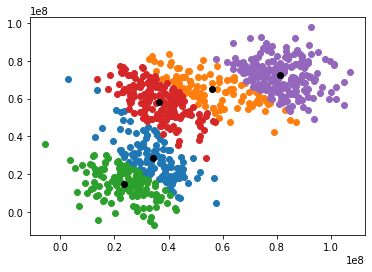

In [92]:
clustering = Clustering(5)
clustering.kMeans(X)

Aclaracion: Para esta conjunto de datos se nota la diferencia en la escala y , que es mucho mas grande que la de x